In [40]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#Upload from csv
data_set_path = "school_attendance.csv"

#Read data and results
data_set_df = pd.read_csv(data_set_path)

data_set_df.head(30)



,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,June 2022,07/22/2022
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,June 2022,07/22/2022
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111.0,0.8927,221213.0,0.9340,June 2022,07/22/2022
6,00000CT,Connecticut,English Learners,English Learners,43571,0.8976,40619.0,0.8948,45413.0,0.9389,June 2022,07/22/2022
7,00000CT,Connecticut,Race/Ethnicity,All other races,48700,0.9314,47339.0,0.9483,47260.0,0.9559,June 2022,07/22/2022
8,00000CT,Connecticut,Race/Ethnicity,Black or African American,63099,0.8941,62267.0,0.8931,64200.0,0.9401,June 2022,07/22/2022
9,00000CT,Connecticut,Race/Ethnicity,Hispanic/Latino of any race,146298,0.8935,138260.0,0.8975,136953.0,0.9362,June 2022,07/22/2022


In [41]:
#Count number of districts
name_unique = data_set_df["District name"].value_counts()
name_count = len(name_unique)
name_count

201

In [42]:
#List all columns
data_set_df.columns


Index(['District code', 'District name', 'Category', 'Student group',
       '2021-2022 student count - year to date',
       '2021-2022 attendance rate - year to date', '2020-2021 student count',
       '2020-2021 attendance rate', '2019-2020 student count',
       '2019-2020 attendance rate', 'Reporting period', 'Date update'],
      dtype='object')

In [43]:
#Check for incomplete rows
data_set_df.count()

District code                               2019
District name                               2019
Category                                    1818
Student group                               2019
2021-2022 student count - year to date      2019
2021-2022 attendance rate - year to date    2019
2020-2021 student count                     1963
2020-2021 attendance rate                   1963
2019-2020 student count                     1957
2019-2020 attendance rate                   1957
Reporting period                            2019
Date update                                 2019
dtype: int64

In [44]:
data_set_df.dtypes

District code                                object
District name                                object
Category                                     object
Student group                                object
2021-2022 student count - year to date        int64
2021-2022 attendance rate - year to date    float64
2020-2021 student count                     float64
2020-2021 attendance rate                   float64
2019-2020 student count                     float64
2019-2020 attendance rate                   float64
Reporting period                             object
Date update                                  object
dtype: object

# Average attendance rates

In [45]:
all_students_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]
all_students_df = all_students_df[["District name", "2021-2022 attendance rate - year to date",
                                  "2020-2021 attendance rate", "2019-2020 attendance rate"]]
all_students_df

,District name,2021-2022 attendance rate - year to date,2020-2021 attendance rate,2019-2020 attendance rate
0,Connecticut,0.9169,0.9294,0.9479
13,Andover School District,0.9386,0.9680,0.9502
19,Ansonia School District,0.9045,0.8923,0.9413
31,Ashford School District,0.9309,0.9550,0.9585
40,Avon School District,0.9457,0.9621,0.9583
...,...,...,...,...
1972,Unified School District #2,0.9202,0.9602,0.9564
1977,Connecticut Technical Education and Career System,0.8985,0.9321,0.9480
1990,Norwich Free Academy District,0.8940,0.9000,0.9319
2002,The Gilbert School District,0.8901,0.9458,0.9394


# Overall Category Distribution

In [46]:
#Limit down to only values for whole state
all_schools_df = data_set_df.loc[(data_set_df["District name"]=="Connecticut")&(data_set_df["Student group"]!="All Students")]
all_schools_df.head(6)

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,June 2022,07/22/2022
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111.0,0.8927,221213.0,0.9340,June 2022,07/22/2022
6,00000CT,Connecticut,English Learners,English Learners,43571,0.8976,40619.0,0.8948,45413.0,0.9389,June 2022,07/22/2022


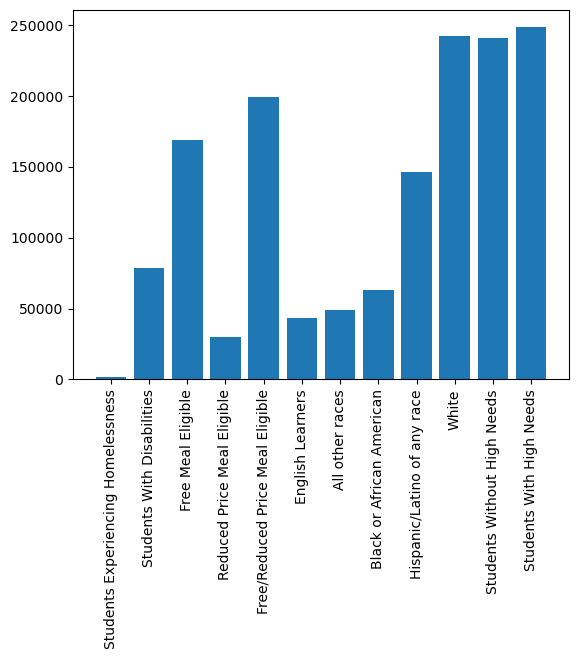

In [47]:
student_groups = all_schools_df["Student group"]

counts = all_schools_df["2021-2022 student count - year to date"]

x_axis = np.arange(len(student_groups))
plt.bar(x_axis, counts)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, student_groups, rotation=90)

plt.show()

In [48]:
#Limit down to all students and free/reduced meal groups
all_fr_df = all_schools_df.loc[(all_schools_df["Student group"]=="All Students") | (all_schools_df["Student group"]=="Free/Reduced Price Meal Eligible")]
all_fr_df

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111.0,0.8927,221213.0,0.934,June 2022,07/22/2022


In [49]:
#LOOK AT AGAIN


for index,row in all_fr_df.iterrows():
    fr_count.append(row[4])
    fr_groups.append(row[3])

#Make Pie Chart
plt.pie(fr_count, labels=fr_groups)
plt.show()

NameError: name 'fr_count' is not defined

# Free and Reduced Meals

In [50]:
#Filter by free and reduced meals
fr_df = data_set_df.loc[(data_set_df["Student group"]=="Free/Reduced Price Meal Eligible") | (data_set_df["Student group"]=="All Students")]

fr_df

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,June 2022,07/22/2022
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111.0,0.8927,221213.0,0.9340,June 2022,07/22/2022
13,0010011,Andover School District,NaN,All Students,161,0.9386,144.0,0.9680,158.0,0.9502,June 2022,07/22/2022
15,0010011,Andover School District,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,30,0.9274,31.0,0.9414,37.0,0.9401,June 2022,07/22/2022
19,0020011,Ansonia School District,NaN,All Students,2139,0.9045,2153.0,0.8923,2185.0,0.9413,June 2022,07/22/2022
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,9010022,Norwich Free Academy District,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,1034,0.8746,932.0,0.8626,1164.0,0.9185,June 2022,07/22/2022
2002,9020022,The Gilbert School District,NaN,All Students,421,0.8901,445.0,0.9458,470.0,0.9394,June 2022,07/22/2022
2006,9020022,The Gilbert School District,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198,0.8674,205.0,0.9256,196.0,0.9248,June 2022,07/22/2022
2011,9030022,The Woodstock Academy District,NaN,All Students,1060,0.9288,1046.0,0.9589,1113.0,0.9471,June 2022,07/22/2022


In [51]:
fr_df=fr_df[(fr_df["District name"]!="Union School District")&(fr_df["District name"]!="Sherman School District")&(fr_df["District name"]!="Hampton School District")&(fr_df["District name"]!="New Canaan School District")]
fr_df['District name'].value_counts()

District name
Connecticut                       2
Trumbull School District          2
Voluntown School District         2
Wallingford School District       2
Waterbury School District         2
                                 ..
Marlborough School District       2
Meriden School District           2
Middletown School District        2
Milford School District           2
The Woodstock Academy District    2
Name: count, Length: 197, dtype: int64

In [52]:
#Loop and pull out counts
#Make lists
all_students_counts=[]
fr_students_counts=[]

#Create loop to create lists for counts
for index, row in fr_df.iterrows():
    if row["Student group"]=="All Students":
        all_students_counts.append(row["2021-2022 student count - year to date"])
    if row["Student group"]=="Free/Reduced Price Meal Eligible":
        fr_students_counts.append(row["2021-2022 student count - year to date"])

#Make percents list to store percent free and reduced meals of each school
i=0
percents = []
#Loop to add to percents list
for item in fr_students_counts:
    percents.append(fr_students_counts[i]/all_students_counts[i])
    i=i+1
    


In [53]:
#Filter by Free/Reduced Meals
frl_df = data_set_df.loc[(data_set_df["Student group"]=="Free/Reduced Price Meal Eligible")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
frl_df = frl_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date","2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_frl_df = pd.merge(all_df, frl_df, on="District name", how="right")

#Check counts
merged_frl_df.dtypes



District name                                object
Student group_x                              object
2021-2022 student count - year to date_x      int64
2021-2022 attendance rate - year to date    float64
Student group_y                              object
2021-2022 student count - year to date_y      int64
dtype: object

In [54]:
merged_frl_df["Not FRL Count"] = (merged_frl_df["2021-2022 student count - year to date_x"]-merged_frl_df["2021-2022 student count - year to date_y"])
merged_frl_df.head()

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y,Not FRL Count
0,Connecticut,All Students,500285,0.9169,Free/Reduced Price Meal Eligible,198889,301396
1,Andover School District,All Students,161,0.9386,Free/Reduced Price Meal Eligible,30,131
2,Ansonia School District,All Students,2139,0.9045,Free/Reduced Price Meal Eligible,1417,722
3,Ashford School District,All Students,343,0.9309,Free/Reduced Price Meal Eligible,113,230
4,Avon School District,All Students,3057,0.9457,Free/Reduced Price Meal Eligible,286,2771


In [55]:
#Calculate FRM percents of total
merged_frl_df["Percentage Free/Reduced Meal"]=merged_frl_df["2021-2022 student count - year to date_y"]/merged_frl_df['2021-2022 student count - year to date_x']
#merged_frl_df["Percentage Free/Reduced Meal"] = merged_frl_df["Percentage Free/Reduced Meal"].map('{:0.2%}'.format)
#Calculate Not FRM percents of total
merged_frl_df["Percentage Not Free/Reduced Meal"]=merged_frl_df["Not FRL Count"]/merged_frl_df['2021-2022 student count - year to date_x']
#merged_frl_df["Percentage Not Free/Reduced Meal"] = merged_frl_df["Percentage Not Free/Reduced Meal"].map('{:0.2%}'.format)
merged_frl_df.head()

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y,Not FRL Count,Percentage Free/Reduced Meal,Percentage Not Free/Reduced Meal
0,Connecticut,All Students,500285,0.9169,Free/Reduced Price Meal Eligible,198889,301396,0.397551,0.602449
1,Andover School District,All Students,161,0.9386,Free/Reduced Price Meal Eligible,30,131,0.186335,0.813665
2,Ansonia School District,All Students,2139,0.9045,Free/Reduced Price Meal Eligible,1417,722,0.662459,0.337541
3,Ashford School District,All Students,343,0.9309,Free/Reduced Price Meal Eligible,113,230,0.329446,0.670554
4,Avon School District,All Students,3057,0.9457,Free/Reduced Price Meal Eligible,286,2771,0.093556,0.906444


In [56]:
#Check Counts
merged_frl_df.dtypes

District name                                object
Student group_x                              object
2021-2022 student count - year to date_x      int64
2021-2022 attendance rate - year to date    float64
Student group_y                              object
2021-2022 student count - year to date_y      int64
Not FRL Count                                 int64
Percentage Free/Reduced Meal                float64
Percentage Not Free/Reduced Meal            float64
dtype: object

In [57]:
merged_con_df = merged_frl_df.loc[merged_frl_df["District name"]=="Connecticut"]
merged_con_df

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y,Not FRL Count,Percentage Free/Reduced Meal,Percentage Not Free/Reduced Meal
0,Connecticut,All Students,500285,0.9169,Free/Reduced Price Meal Eligible,198889,301396,0.397551,0.602449


-0.6440007109406707


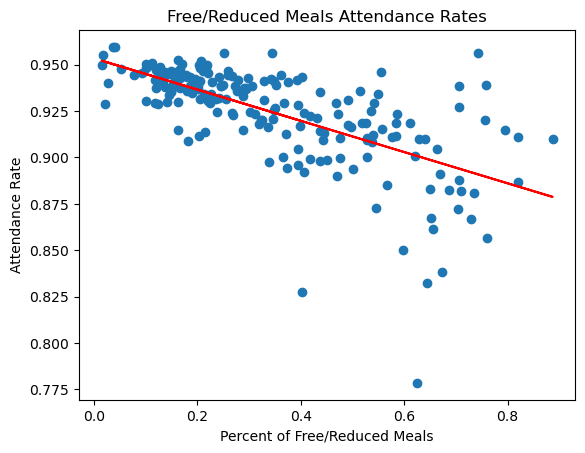

In [58]:
#Scatter plot for FR Meals
x_values = merged_frl_df["Percentage Free/Reduced Meal"]
y_values = merged_frl_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of Free/Reduced Meals')
plt.ylabel('Attendance Rate')
plt.title("Free/Reduced Meals Attendance Rates")
print(rvalue)
plt.show()

In [59]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.64


0.6440007109406707


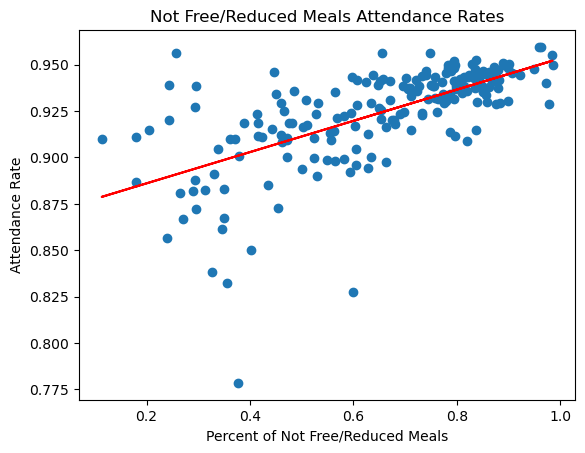

In [60]:
x_values = merged_frl_df["Percentage Not Free/Reduced Meal"]
y_values = merged_frl_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of Not Free/Reduced Meals')
plt.ylabel('Attendance Rate')
plt.title("Not Free/Reduced Meals Attendance Rates")
print(rvalue)
plt.show()

/var/folders/x5/vxxw6g_96f337pf8r_zr_15h0000gn/T/ipykernel_94697/3523356250.py:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("Percentage Free/Reduced Meal", "Percentage Not Free/Reduced Meal")


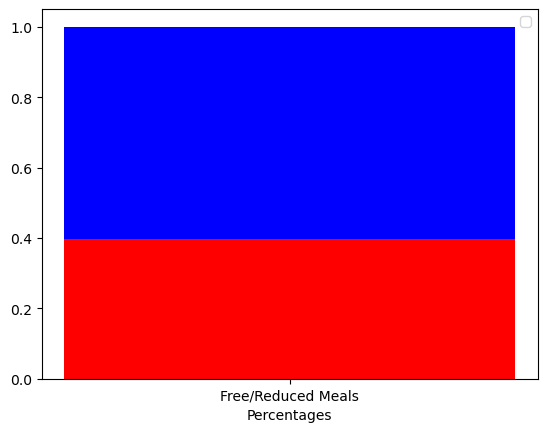

In [61]:
#Stacked Bar Graph
x = ["Free/Reduced Meals"]
y1 = merged_con_df["Percentage Free/Reduced Meal"]
y2 = merged_con_df["Percentage Not Free/Reduced Meal"]

plt.bar(x, y1, color="r")
plt.bar(x, y2, bottom=y1, color="b")
plt.xlabel("Percentages")
plt.legend("Percentage Free/Reduced Meal", "Percentage Not Free/Reduced Meal")
plt.show()

# English Learners

In [62]:
#Filter by English learners
ell_df = data_set_df.loc[(data_set_df["Student group"]=="English Learners")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
ell_df = ell_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_ell_df = pd.merge(all_df, ell_df, on="District name", how="right")

#Check counts
merged_ell_df.head()



,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y
0,Connecticut,All Students,500285,0.9169,English Learners,43571
1,Ansonia School District,All Students,2139,0.9045,English Learners,122
2,Avon School District,All Students,3057,0.9457,English Learners,76
3,Berlin School District,All Students,2613,0.9341,English Learners,95
4,Bethel School District,All Students,3102,0.9375,English Learners,167


In [63]:
#Calculate ELL percents of total
merged_ell_df["Percentage ELL"]=merged_ell_df["2021-2022 student count - year to date_y"]/merged_ell_df['2021-2022 student count - year to date_x']

#Check Count
merged_ell_df.head()

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y,Percentage ELL
0,Connecticut,All Students,500285,0.9169,English Learners,43571,0.087092
1,Ansonia School District,All Students,2139,0.9045,English Learners,122,0.057036
2,Avon School District,All Students,3057,0.9457,English Learners,76,0.024861
3,Berlin School District,All Students,2613,0.9341,English Learners,95,0.036357
4,Bethel School District,All Students,3102,0.9375,English Learners,167,0.053836


-0.5324713816396521


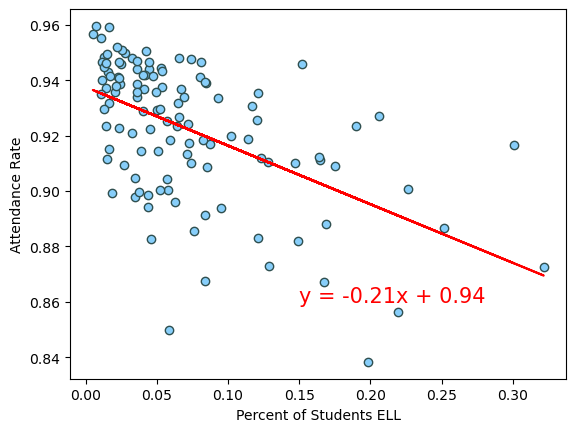

In [65]:
x_values = merged_ell_df["Percentage ELL"]
y_values = merged_ell_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkslategray", facecolors="lightskyblue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of Students ELL')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.15,0.86),fontsize=15, color = "red")
print(rvalue)

#Save Figure
plt.savefig("Images/ScatterELL.png")


plt.show()

In [66]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.53


# Students with Disabilities

In [67]:
#Filter by Student with Disabilites
dis_df = data_set_df.loc[(data_set_df["Student group"]=="Students With Disabilities")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
dis_df = dis_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_dis_df = pd.merge(all_df, dis_df, on="District name", how="right")

#Check counts
merged_dis_df.count()

District name                               190
Student group_x                             190
2021-2022 student count - year to date_x    190
2021-2022 attendance rate - year to date    190
Student group_y                             190
2021-2022 student count - year to date_y    190
dtype: int64

In [68]:
#Calculate Disabilites percents of total
merged_dis_df["Percentage Disabilities"]=merged_dis_df["2021-2022 student count - year to date_y"]/merged_dis_df['2021-2022 student count - year to date_x']
#Check Count
merged_dis_df.count()

District name                               190
Student group_x                             190
2021-2022 student count - year to date_x    190
2021-2022 attendance rate - year to date    190
Student group_y                             190
2021-2022 student count - year to date_y    190
Percentage Disabilities                     190
dtype: int64

-0.46677539240579297


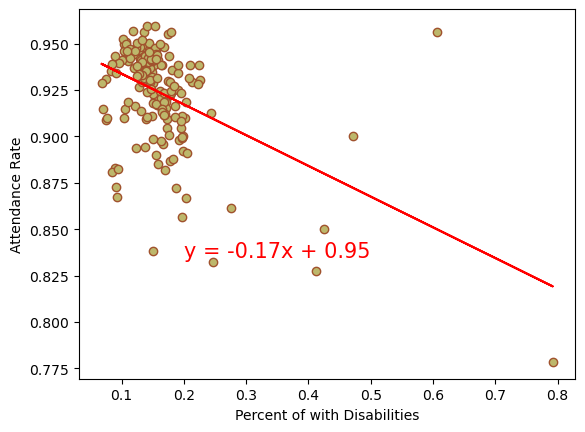

In [69]:
x_values = merged_dis_df["Percentage Disabilities"]
y_values = merged_dis_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="sienna", facecolors="darkkhaki")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of with Disabilities')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.2,0.835),fontsize=15, color = "red")
print(rvalue)

plt.savefig("Images/ScatterDis.png")

plt.show()

In [70]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.47


# Student with High Needs

In [71]:
#Filter by Student with High Needs
needs_df = data_set_df.loc[(data_set_df["Student group"]=="Students With High Needs")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
needs_df = needs_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_needs_df = pd.merge(all_df, needs_df, on="District name", how="right")

#Check counts
merged_needs_df.count()

District name                               197
Student group_x                             197
2021-2022 student count - year to date_x    197
2021-2022 attendance rate - year to date    197
Student group_y                             197
2021-2022 student count - year to date_y    197
dtype: int64

In [72]:
#Calculate High Needs percents of total
merged_needs_df["Percentage High Needs"]=merged_needs_df["2021-2022 student count - year to date_y"]/merged_needs_df['2021-2022 student count - year to date_x']
#Check Count
merged_needs_df.count()

District name                               197
Student group_x                             197
2021-2022 student count - year to date_x    197
2021-2022 attendance rate - year to date    197
Student group_y                             197
2021-2022 student count - year to date_y    197
Percentage High Needs                       197
dtype: int64

-0.719825743438532


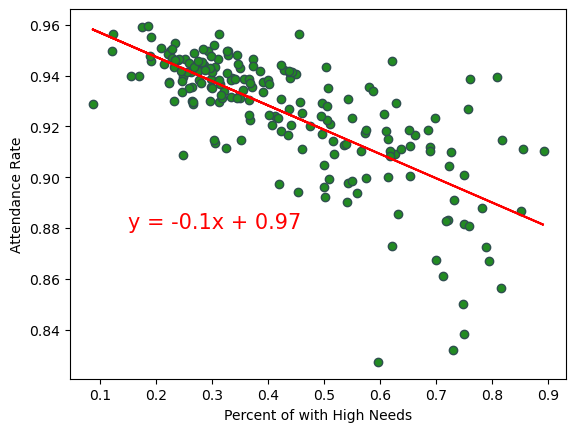

In [74]:
x_values = merged_needs_df["Percentage High Needs"]
y_values = merged_needs_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkslategray", facecolors="forestgreen")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of with High Needs')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.15,0.88),fontsize=15, color = "red")
print(rvalue)
plt.savefig("Images/Scatter.png")
plt.show()

In [75]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.72


# Students Race = Black or African American

In [76]:
#Filter by Student Race = Black of African American
black_df = data_set_df.loc[(data_set_df["Student group"]=="Black or African American")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
black_df = black_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_black_df = pd.merge(all_df, black_df, on="District name", how="right")

#Check counts
merged_black_df.count()

District name                               128
Student group_x                             128
2021-2022 student count - year to date_x    128
2021-2022 attendance rate - year to date    128
Student group_y                             128
2021-2022 student count - year to date_y    128
dtype: int64

In [77]:
#Calculate Black/African American percents of total
merged_black_df["Percentage Black or African American"]=merged_black_df["2021-2022 student count - year to date_y"]/merged_black_df['2021-2022 student count - year to date_x']
#Check Count
merged_black_df.count()

District name                               128
Student group_x                             128
2021-2022 student count - year to date_x    128
2021-2022 attendance rate - year to date    128
Student group_y                             128
2021-2022 student count - year to date_y    128
Percentage Black or African American        128
dtype: int64

-0.4734319890187277


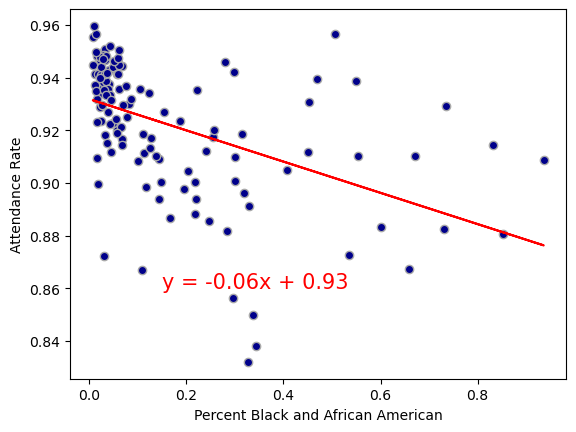

In [78]:
x_values = merged_black_df["Percentage Black or African American"]
y_values = merged_black_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkgray", facecolors="darkblue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent Black and African American')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.15,0.86),fontsize=15, color = "red")
print(rvalue)
plt.savefig("Images/ScatterBlack.png")
plt.show()

In [79]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.47


# Students Race = Hispanic/Latino of any race

In [80]:
#Filter by Student Race = Hispanic/Latino of any race
his_df = data_set_df.loc[(data_set_df["Student group"]=="Hispanic/Latino of any race")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
his_df = his_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_his_df = pd.merge(all_df, his_df, on="District name", how="right")

#Check counts
merged_his_df.count()

District name                               168
Student group_x                             168
2021-2022 student count - year to date_x    168
2021-2022 attendance rate - year to date    168
Student group_y                             168
2021-2022 student count - year to date_y    168
dtype: int64

In [81]:
#Calculate Hispanic/Latino of any race percents of total
merged_his_df["Percentage Hispanic/Latino of any race"]=merged_his_df["2021-2022 student count - year to date_y"]/merged_his_df['2021-2022 student count - year to date_x']
#Check Count
merged_his_df.count()

District name                               168
Student group_x                             168
2021-2022 student count - year to date_x    168
2021-2022 attendance rate - year to date    168
Student group_y                             168
2021-2022 student count - year to date_y    168
Percentage Hispanic/Latino of any race      168
dtype: int64

-0.5042716980200688


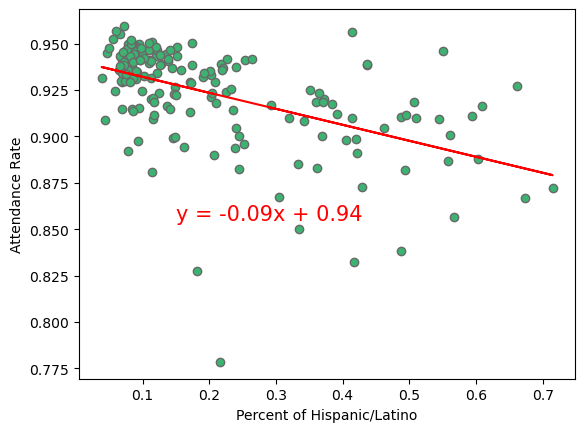

In [82]:
x_values = merged_his_df["Percentage Hispanic/Latino of any race"]
y_values = merged_his_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="dimgrey", facecolors="mediumseagreen")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of Hispanic/Latino')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.15,0.855),fontsize=15, color = "red")
print(rvalue)
plt.savefig("Images/ScatterHisp.png")

plt.show()

In [83]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.5


# Students Race = White

In [84]:
#Filter by Student Race = White
white_df = data_set_df.loc[(data_set_df["Student group"]=="White")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
white_df = white_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_white_df = pd.merge(all_df, white_df, on="District name", how="right")

#Check counts
merged_white_df.count()

District name                               182
Student group_x                             182
2021-2022 student count - year to date_x    182
2021-2022 attendance rate - year to date    182
Student group_y                             182
2021-2022 student count - year to date_y    182
dtype: int64

In [85]:
#Calculate Hispanic/Latino of any race percents of total
merged_white_df["Percentage White"]=merged_white_df["2021-2022 student count - year to date_y"]/merged_white_df['2021-2022 student count - year to date_x']

#Check Count
merged_white_df.count()

District name                               182
Student group_x                             182
2021-2022 student count - year to date_x    182
2021-2022 attendance rate - year to date    182
Student group_y                             182
2021-2022 student count - year to date_y    182
Percentage White                            182
dtype: int64

0.5127319750155351


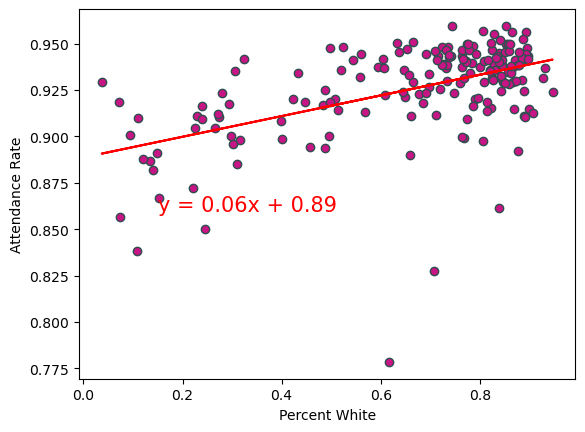

In [86]:
x_values = merged_white_df["Percentage White"]
y_values = merged_white_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkslategray", facecolors="mediumvioletred")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent White')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.15,0.86),fontsize=15, color = "red")
print(rvalue)
plt.savefig("Images/ScatterWhite.png")
plt.show()

In [87]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.51


# Students All Other Races

In [88]:
#Filter by Student Race = All Other
other_df = data_set_df.loc[(data_set_df["Student group"]=="All other races")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
other_df = other_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_other_df = pd.merge(all_df, other_df, on="District name", how="right")

#Check counts
merged_other_df.count()

District name                               121
Student group_x                             121
2021-2022 student count - year to date_x    121
2021-2022 attendance rate - year to date    121
Student group_y                             121
2021-2022 student count - year to date_y    121
dtype: int64

In [89]:
#Calculate Hispanic/Latino of any race percents of total
merged_other_df["Percentage Other Races"]=merged_other_df["2021-2022 student count - year to date_y"]/merged_other_df['2021-2022 student count - year to date_x']

#Check Count
merged_other_df.count()

District name                               121
Student group_x                             121
2021-2022 student count - year to date_x    121
2021-2022 attendance rate - year to date    121
Student group_y                             121
2021-2022 student count - year to date_y    121
Percentage Other Races                      121
dtype: int64

0.22706892629570416


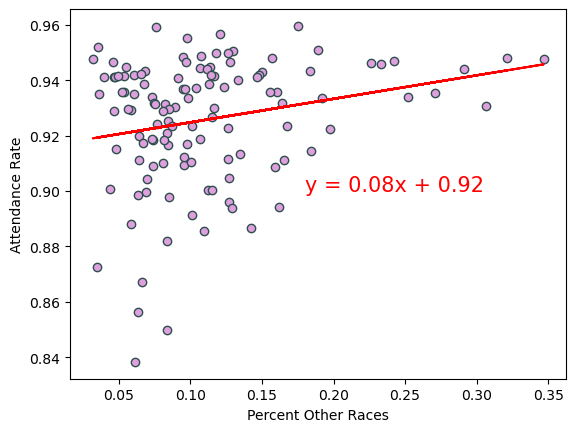

In [90]:
x_values = merged_other_df["Percentage Other Races"]
y_values = merged_other_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkslategray", facecolors="plum")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent Other Races')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.18,0.9),fontsize=15, color = "red")
print(rvalue)
plt.savefig("Images/ScatterOtherRace.png")
plt.show()

In [91]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.23


# Box and Whiskers

### All Students

In [92]:
#Recall Data Frame of All Students attendance rates
all_students_df

,District name,2021-2022 attendance rate - year to date,2020-2021 attendance rate,2019-2020 attendance rate
0,Connecticut,0.9169,0.9294,0.9479
13,Andover School District,0.9386,0.9680,0.9502
19,Ansonia School District,0.9045,0.8923,0.9413
31,Ashford School District,0.9309,0.9550,0.9585
40,Avon School District,0.9457,0.9621,0.9583
...,...,...,...,...
1972,Unified School District #2,0.9202,0.9602,0.9564
1977,Connecticut Technical Education and Career System,0.8985,0.9321,0.9480
1990,Norwich Free Academy District,0.8940,0.9000,0.9319
2002,The Gilbert School District,0.8901,0.9458,0.9394


In [93]:
all_students_df.to_csv("all_students_df.csv")

In [94]:
#Check for counts
all_students_df.count()

District name                               201
2021-2022 attendance rate - year to date    201
2020-2021 attendance rate                   200
2019-2020 attendance rate                   200
dtype: int64

In [95]:
#Drop Null Values
all_students_new_df = all_students_df.dropna(how="any")
all_students_new_df.count()

District name                               200
2021-2022 attendance rate - year to date    200
2020-2021 attendance rate                   200
2019-2020 attendance rate                   200
dtype: int64

In [96]:
all_students_new_df.describe()

,2021-2022 attendance rate - year to date,2020-2021 attendance rate,2019-2020 attendance rate
count,200.000000,200.000000,200.000000
mean,0.924749,0.939221,0.951207
std,0.026291,0.037230,0.012376
min,0.778500,0.772900,0.869600
25%,0.913525,0.926250,0.945925
50%,0.931600,0.951250,0.953500
75%,0.942025,0.964325,0.958025
max,0.959600,0.981100,0.999600


In [97]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020 = all_students_new_df["2019-2020 attendance rate"]
rates_2021 = all_students_new_df["2020-2021 attendance rate"]
rates_2022 = all_students_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020, rates_2021, rates_2022]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.9459249999999999
The upper quartile is 0.9580249999999999
The median is: 0.9535
The IQR is: 0.0121

Lower Bound: 0.9277749999999999
Upper Bound: 0.9761749999999999

The max value is: 0.9996
The min value is: 0.8696
-----------------------------
The lower quartile is: 0.92625
The upper quartile is 0.9643250000000001
The median is: 0.95125
The IQR is: 0.03807500000000008

Lower Bound: 0.8691374999999999
Upper Bound: 1.0214375000000002

The max value is: 0.9811
The min value is: 0.7729
-----------------------------
The lower quartile is: 0.9135249999999999
The upper quartile is 0.942025
The median is: 0.9316
The IQR is: 0.02850000000000008

Lower Bound: 0.8707749999999999
Upper Bound: 0.9847750000000002

The max value is: 0.9596
The min value is: 0.7785
-----------------------------


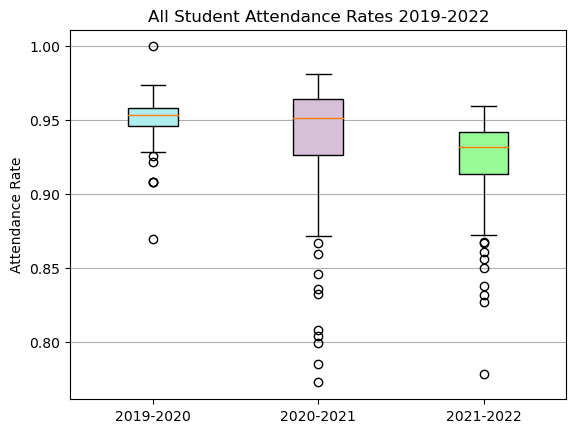

In [98]:

labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020, rates_2021, rates_2022]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
bp_all = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["paleturquoise", "thistle", "palegreen"]
for patch, color in zip(bp_all['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("All Student Attendance Rates 2019-2022")
ax1.yaxis.grid(True)

plt.savefig("Images/AllStudentsBoxPlot.png")

plt.show()

### Free and Reduced Meals

In [99]:
#Filter results based on Free and Reduced Meals
fr_attendance_df = data_set_df.loc[data_set_df["Student group"]=="Free/Reduced Price Meal Eligible"]
#Make new data frame
fr_attendance_df = fr_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
fr_attendance_df.count()

District name                               197
2019-2020 attendance rate                   194
2020-2021 attendance rate                   193
2021-2022 attendance rate - year to date    197
dtype: int64

In [100]:
#Remove Null Values and test count
fr_attendance_new_df = fr_attendance_df.dropna(how="any")
fr_attendance_new_df.count()

District name                               191
2019-2020 attendance rate                   191
2020-2021 attendance rate                   191
2021-2022 attendance rate - year to date    191
dtype: int64

In [101]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020_fr = fr_attendance_new_df["2019-2020 attendance rate"]
rates_2021_fr = fr_attendance_new_df["2020-2021 attendance rate"]
rates_2022_fr = fr_attendance_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020_fr, rates_2021_fr, rates_2022_fr]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.93485
The upper quartile is 0.94885
The median is: 0.9428
The IQR is: 0.014000000000000012

Lower Bound: 0.9138499999999999
Upper Bound: 0.96985

The max value is: 0.9991
The min value is: 0.8196
-----------------------------
The lower quartile is: 0.89905
The upper quartile is 0.9449000000000001
The median is: 0.9267
The IQR is: 0.04585000000000006

Lower Bound: 0.8302749999999999
Upper Bound: 1.013675

The max value is: 0.9774
The min value is: 0.6882
-----------------------------
The lower quartile is: 0.8994
The upper quartile is 0.9264
The median is: 0.9133
The IQR is: 0.027000000000000024

Lower Bound: 0.8589
Upper Bound: 0.9669000000000001

The max value is: 0.9541
The min value is: 0.7254
-----------------------------


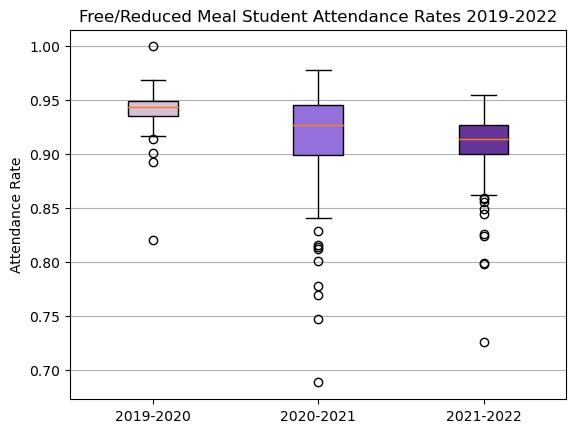

In [103]:

labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_fr, rates_2021_fr, rates_2022_fr]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
bp_fr = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["thistle", "mediumpurple", "rebeccapurple"]
for patch, color in zip(bp_fr['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Free/Reduced Meal Student Attendance Rates 2019-2022")
ax1.yaxis.grid(True)

plt.savefig("Images/FRBoxPlot.png")

plt.show()

### English Language Learners

In [104]:
#Filter results based on English Language Learners
ell_attendance_df = data_set_df.loc[data_set_df["Student group"]=="English Learners"]
#Make new data frame
ell_attendance_df = ell_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
ell_attendance_df.count()

District name                               117
2019-2020 attendance rate                   112
2020-2021 attendance rate                   112
2021-2022 attendance rate - year to date    117
dtype: int64

In [105]:
#Remove Null Values and test count
ell_attendance_new_df = ell_attendance_df.dropna(how="any")
ell_attendance_new_df.count()

District name                               112
2019-2020 attendance rate                   112
2020-2021 attendance rate                   112
2021-2022 attendance rate - year to date    112
dtype: int64

In [106]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020_ell = ell_attendance_new_df["2019-2020 attendance rate"]
rates_2021_ell = ell_attendance_new_df["2020-2021 attendance rate"]
rates_2022_ell = ell_attendance_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020_ell, rates_2021_ell, rates_2022_ell]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.9408749999999999
The upper quartile is 0.9578249999999999
The median is: 0.95025
The IQR is: 0.01695000000000002

Lower Bound: 0.9154499999999999
Upper Bound: 0.98325

The max value is: 0.9994
The min value is: 0.9003
-----------------------------
The lower quartile is: 0.898825
The upper quartile is 0.9571999999999999
The median is: 0.9380999999999999
The IQR is: 0.058374999999999955

Lower Bound: 0.8112625
Upper Bound: 1.0447624999999998

The max value is: 0.9788
The min value is: 0.7901
-----------------------------
The lower quartile is: 0.9072749999999999
The upper quartile is 0.939175
The median is: 0.92445
The IQR is: 0.03190000000000004

Lower Bound: 0.8594249999999999
Upper Bound: 0.987025

The max value is: 0.962
The min value is: 0.8423
-----------------------------


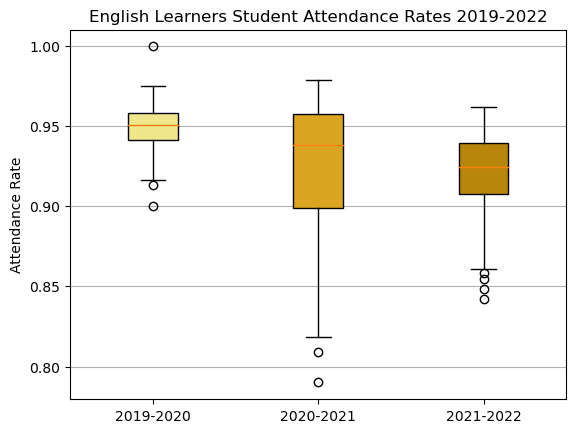

In [107]:
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_ell, rates_2021_ell, rates_2022_ell]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
bp_ell = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["khaki", "goldenrod", "darkgoldenrod"]
for patch, color in zip(bp_ell['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("English Learners Student Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
plt.savefig("Images/ELLBoxPlot.png")
plt.show()

### Students with Diabilities

In [108]:
#Filter results based on Students with Disabilities
dis_attendance_df = data_set_df.loc[data_set_df["Student group"]=="Students With Disabilities"]
#Make new data frame
dis_attendance_df = dis_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
dis_attendance_df.count()

District name                               190
2019-2020 attendance rate                   184
2020-2021 attendance rate                   184
2021-2022 attendance rate - year to date    190
dtype: int64

In [109]:
#Remove Null Values and test count
dis_attendance_new_df = dis_attendance_df.dropna(how="any")
dis_attendance_new_df.count()

District name                               184
2019-2020 attendance rate                   184
2020-2021 attendance rate                   184
2021-2022 attendance rate - year to date    184
dtype: int64

In [110]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020_dis = dis_attendance_new_df["2019-2020 attendance rate"]
rates_2021_dis = dis_attendance_new_df["2020-2021 attendance rate"]
rates_2022_dis = dis_attendance_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020_dis, rates_2021_dis, rates_2022_dis]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.9274
The upper quartile is 0.946825
The median is: 0.9393
The IQR is: 0.019425000000000026

Lower Bound: 0.8982625
Upper Bound: 0.9759625000000001

The max value is: 0.9993
The min value is: 0.8701
-----------------------------
The lower quartile is: 0.896725
The upper quartile is 0.9467
The median is: 0.92865
The IQR is: 0.04997499999999999

Lower Bound: 0.8217625
Upper Bound: 1.0216625

The max value is: 0.9819
The min value is: 0.7498
-----------------------------
The lower quartile is: 0.890775
The upper quartile is 0.92655
The median is: 0.9124
The IQR is: 0.035775

Lower Bound: 0.8371124999999999
Upper Bound: 0.9802124999999999

The max value is: 0.9576
The min value is: 0.7911
-----------------------------


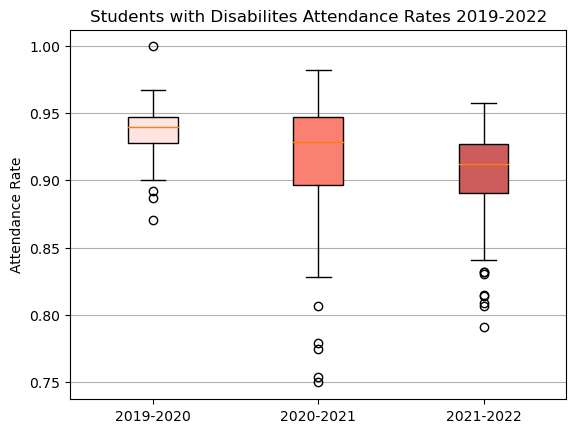

In [112]:
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_dis, rates_2021_dis, rates_2022_dis]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
bp_dis = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["mistyrose", "salmon", "indianred"]
for patch, color in zip(bp_dis['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Students with Disabilites Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
plt.savefig("Images/DISBoxPlot.png")
plt.show()

### Students with High Needs

In [113]:
#Filter results based on Students with High Needs
needs_attendance_df = data_set_df.loc[data_set_df["Student group"]=="Students With High Needs"]
#Make new data frame
needs_attendance_df = needs_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
needs_attendance_df.count()

District name                               197
2019-2020 attendance rate                   195
2020-2021 attendance rate                   195
2021-2022 attendance rate - year to date    197
dtype: int64

In [114]:
#Remove Null Values and test count
needs_attendance_new_df = needs_attendance_df.dropna(how="any")
needs_attendance_new_df.count()

District name                               195
2019-2020 attendance rate                   195
2020-2021 attendance rate                   195
2021-2022 attendance rate - year to date    195
dtype: int64

In [115]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020_needs = needs_attendance_new_df["2019-2020 attendance rate"]
rates_2021_needs = needs_attendance_new_df["2020-2021 attendance rate"]
rates_2022_needs = needs_attendance_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020_needs, rates_2021_needs, rates_2022_needs]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.9371
The upper quartile is 0.9498
The median is: 0.9446
The IQR is: 0.012699999999999934

Lower Bound: 0.9180500000000001
Upper Bound: 0.9688499999999999

The max value is: 0.9994
The min value is: 0.9001
-----------------------------
The lower quartile is: 0.9067000000000001
The upper quartile is 0.9494
The median is: 0.9336
The IQR is: 0.04269999999999996

Lower Bound: 0.8426500000000001
Upper Bound: 1.01345

The max value is: 0.979
The min value is: 0.754
-----------------------------
The lower quartile is: 0.903
The upper quartile is 0.9286
The median is: 0.9178
The IQR is: 0.025599999999999956

Lower Bound: 0.8646
Upper Bound: 0.9669999999999999

The max value is: 0.9537
The min value is: 0.8102
-----------------------------


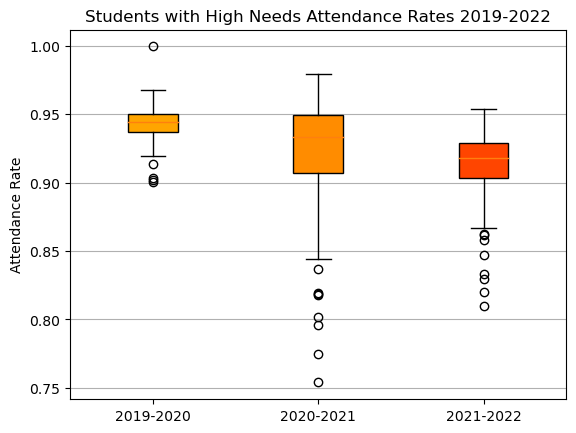

In [116]:
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_needs, rates_2021_needs, rates_2022_needs]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
bp_needs = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["orange", "darkorange", "orangered"]
for patch, color in zip(bp_needs['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Students with High Needs Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
plt.savefig("Images/NeedsBoxPlot.png")
plt.show()

### Race = Black

In [117]:
#Filter results based on Students with High Needs
black_attendance_df = data_set_df.loc[data_set_df["Student group"]=="Black or African American"]
#Make new data frame
black_attendance_df = black_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
black_attendance_df.count()

District name                               128
2019-2020 attendance rate                   122
2020-2021 attendance rate                   123
2021-2022 attendance rate - year to date    128
dtype: int64

In [118]:
#Remove Null Values and test count
black_attendance_new_df = black_attendance_df.dropna(how="any")
black_attendance_new_df.count()

District name                               122
2019-2020 attendance rate                   122
2020-2021 attendance rate                   122
2021-2022 attendance rate - year to date    122
dtype: int64

In [119]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020_black = black_attendance_new_df["2019-2020 attendance rate"]
rates_2021_black = black_attendance_new_df["2020-2021 attendance rate"]
rates_2022_black = black_attendance_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020_black, rates_2021_black, rates_2022_black]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.943125
The upper quartile is 0.9596
The median is: 0.95095
The IQR is: 0.016475000000000017

Lower Bound: 0.9184125
Upper Bound: 0.9843125

The max value is: 0.9989
The min value is: 0.9099
-----------------------------
The lower quartile is: 0.9011
The upper quartile is 0.946725
The median is: 0.93005
The IQR is: 0.04562500000000003

Lower Bound: 0.8326625
Upper Bound: 1.0151625000000002

The max value is: 0.9798
The min value is: 0.7805
-----------------------------
The lower quartile is: 0.902475
The upper quartile is 0.93875
The median is: 0.9242
The IQR is: 0.036274999999999946

Lower Bound: 0.8480625000000002
Upper Bound: 0.9931625

The max value is: 0.9625
The min value is: 0.8205
-----------------------------


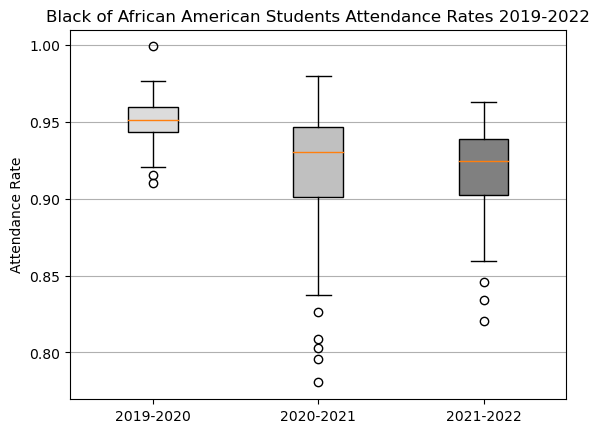

In [121]:
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_black, rates_2021_black, rates_2022_black]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
bp_black = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["gainsboro", "silver", "grey"]
for patch, color in zip(bp_black['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Black of African American Students Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
plt.savefig("Images/BlackBoxPlot.png")
plt.show()

### Race = Hispanic

In [122]:
#Filter results based on Students with High Needs
his_attendance_df = data_set_df.loc[data_set_df["Student group"]=="Hispanic/Latino of any race"]
#Make new data frame
his_attendance_df = his_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
his_attendance_df.count()

District name                               168
2019-2020 attendance rate                   153
2020-2021 attendance rate                   159
2021-2022 attendance rate - year to date    168
dtype: int64

In [123]:
#Remove Null Values and test count
his_attendance_new_df = his_attendance_df.dropna(how="any")
his_attendance_new_df.count()

District name                               151
2019-2020 attendance rate                   151
2020-2021 attendance rate                   151
2021-2022 attendance rate - year to date    151
dtype: int64

In [124]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020_his = his_attendance_new_df["2019-2020 attendance rate"]
rates_2021_his = his_attendance_new_df["2020-2021 attendance rate"]
rates_2022_his = his_attendance_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020_his, rates_2021_his, rates_2022_his]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.9365
The upper quartile is 0.9518
The median is: 0.9466
The IQR is: 0.01529999999999998

Lower Bound: 0.9135500000000001
Upper Bound: 0.97475

The max value is: 0.9991
The min value is: 0.8879
-----------------------------
The lower quartile is: 0.8996999999999999
The upper quartile is 0.9477
The median is: 0.9301
The IQR is: 0.04800000000000004

Lower Bound: 0.8276999999999999
Upper Bound: 1.0197

The max value is: 0.983
The min value is: 0.7369
-----------------------------
The lower quartile is: 0.8986000000000001
The upper quartile is 0.9317
The median is: 0.9156
The IQR is: 0.03309999999999991

Lower Bound: 0.8489500000000002
Upper Bound: 0.9813499999999998

The max value is: 0.9578
The min value is: 0.8038
-----------------------------


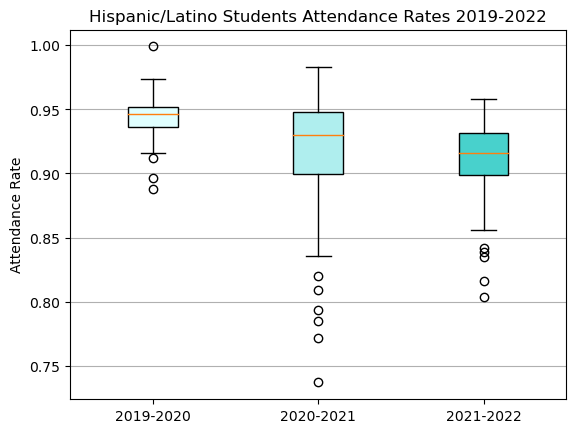

In [126]:
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_his, rates_2021_his, rates_2022_his]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
bp_his = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["lightcyan", "paleturquoise", "mediumturquoise"]
for patch, color in zip(bp_his['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Hispanic/Latino Students Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
plt.savefig("Images/HisBoxPlot.png")
plt.show()

### Race = White

In [127]:
#Filter results based on Students with High Needs
white_attendance_df = data_set_df.loc[data_set_df["Student group"]=="White"]
#Make new data frame
white_attendance_df = white_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
white_attendance_df.count()

District name                               182
2019-2020 attendance rate                   179
2020-2021 attendance rate                   180
2021-2022 attendance rate - year to date    182
dtype: int64

In [128]:
#Remove Null Values and test count
white_attendance_new_df = white_attendance_df.dropna(how="any")
white_attendance_new_df.count()

District name                               179
2019-2020 attendance rate                   179
2020-2021 attendance rate                   179
2021-2022 attendance rate - year to date    179
dtype: int64

In [129]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020_white = white_attendance_new_df["2019-2020 attendance rate"]
rates_2021_white = white_attendance_new_df["2020-2021 attendance rate"]
rates_2022_white = white_attendance_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020_white, rates_2021_white, rates_2022_white]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.9479
The upper quartile is 0.9577
The median is: 0.9536
The IQR is: 0.009800000000000031

Lower Bound: 0.9331999999999999
Upper Bound: 0.9724

The max value is: 0.9998
The min value is: 0.9043
-----------------------------
The lower quartile is: 0.9379500000000001
The upper quartile is 0.96565
The median is: 0.955
The IQR is: 0.027699999999999947

Lower Bound: 0.8964000000000001
Upper Bound: 1.0071999999999999

The max value is: 0.9806
The min value is: 0.8025
-----------------------------
The lower quartile is: 0.9201
The upper quartile is 0.9443
The median is: 0.9353
The IQR is: 0.0242

Lower Bound: 0.8838
Upper Bound: 0.9806

The max value is: 0.9596
The min value is: 0.7826
-----------------------------


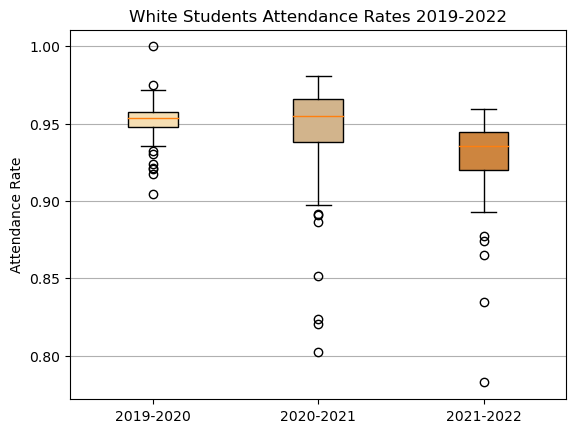

In [130]:
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_white, rates_2021_white, rates_2022_white]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["wheat", "tan", "peru"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("White Students Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
plt.savefig("Images/WhiteBoxPlot.png")
plt.show()

# Compare all in 2021-2022

In [131]:
#Compare races
#White
rates_2020_white = white_attendance_new_df["2019-2020 attendance rate"]
rates_2021_white = white_attendance_new_df["2020-2021 attendance rate"]
rates_2022_white = white_attendance_new_df["2021-2022 attendance rate - year to date"]

#Black
rates_2020_black = black_attendance_new_df["2019-2020 attendance rate"]
rates_2021_black = black_attendance_new_df["2020-2021 attendance rate"]
rates_2022_black = black_attendance_new_df["2021-2022 attendance rate - year to date"]

#Hispanic
rates_2020_his = his_attendance_new_df["2019-2020 attendance rate"]
rates_2021_his = his_attendance_new_df["2020-2021 attendance rate"]
rates_2022_his = his_attendance_new_df["2021-2022 attendance rate - year to date"]

#All
rates_2020 = all_students_new_df["2019-2020 attendance rate"]
rates_2021 = all_students_new_df["2020-2021 attendance rate"]
rates_2022 = all_students_new_df["2021-2022 attendance rate - year to date"]

#FR Meals
rates_2020_fr = fr_attendance_new_df["2019-2020 attendance rate"]
rates_2021_fr = fr_attendance_new_df["2020-2021 attendance rate"]
rates_2022_fr = fr_attendance_new_df["2021-2022 attendance rate - year to date"]


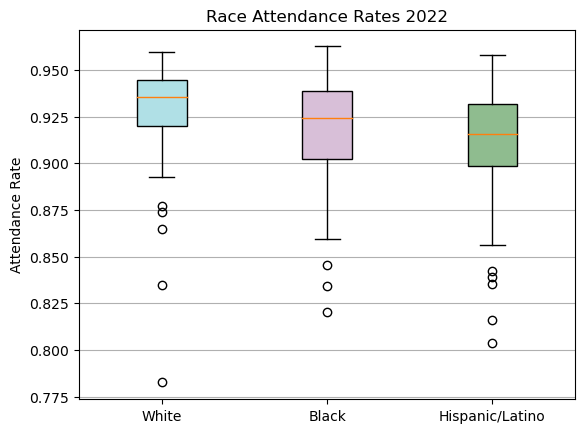

In [133]:
labels = ["White", "Black", "Hispanic/Latino"]
#Plot
x_axis = [rates_2022_white, rates_2022_black, rates_2022_his]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["powderblue", "thistle", "darkseagreen"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Race Attendance Rates 2022")
ax1.yaxis.grid(True)
plt.savefig("Images/RacesBoxPlot.png")
plt.show()

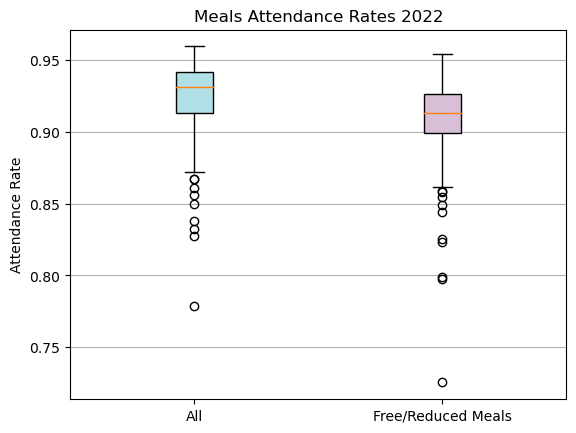

In [134]:
#Plot comparing f&r and all
labels = ["All", "Free/Reduced Meals"]
#Plot
x_axis = [rates_2022, rates_2022_fr]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["powderblue", "thistle"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Meals Attendance Rates 2022")
ax1.yaxis.grid(True)
plt.savefig("Images/FRAllBoxPlot.png")
plt.show()

In [135]:
#Find amount not FR Meals
merged_frl_df["Not FR Lunch"] = merged_frl_df["2021-2022 student count - year to date_x"]-merged_frl_df["2021-2022 student count - year to date_y"]
merged_frl_df.head()

#Sort by attendance rates

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y,Not FRL Count,Percentage Free/Reduced Meal,Percentage Not Free/Reduced Meal,Not FR Lunch
0,Connecticut,All Students,500285,0.9169,Free/Reduced Price Meal Eligible,198889,301396,0.397551,0.602449,301396
1,Andover School District,All Students,161,0.9386,Free/Reduced Price Meal Eligible,30,131,0.186335,0.813665,131
2,Ansonia School District,All Students,2139,0.9045,Free/Reduced Price Meal Eligible,1417,722,0.662459,0.337541,722
3,Ashford School District,All Students,343,0.9309,Free/Reduced Price Meal Eligible,113,230,0.329446,0.670554,230
4,Avon School District,All Students,3057,0.9457,Free/Reduced Price Meal Eligible,286,2771,0.093556,0.906444,2771


In [136]:
#Remove unnecessary columns
merged_frl_reduced_df = merged_frl_df[["District name", "Student group_x",
                               "2021-2022 student count - year to date_x",
                               "Student group_y", "2021-2022 student count - year to date_y"]]
#Check counts
merged_frl_reduced_df.count()

District name                               197
Student group_x                             197
2021-2022 student count - year to date_x    197
Student group_y                             197
2021-2022 student count - year to date_y    197
dtype: int64

In [137]:
#Not FR Meals column
merged_frl_reduced_df["Not FRM Count"]=merged_frl_df[]

SyntaxError: invalid syntax (3126887292.py, line 2)

In [138]:
#Not FR Meals
rate_2022_fr = merged_frl_reduced_df["2021-2022 student count - year to date_y"]
rate_2022_not_fr = merged_frl_reduced_df["2021-2022 attendance rate - year to date"]


#Plot comparing f&r and all
labels = ["Free/Reduced Meals", "Not Free/Reduced Meals"]
#Plot
x_axis = [count_2022_fr, count_2022_not_fr]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["powderblue", "thistle"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Meals Attendance Rates 2022")
ax1.yaxis.grid(True)

plt.show()

KeyError: '2021-2022 attendance rate - year to date'